The first section of this document walks through setting up a TensorFlow installation on a personal Ubuntu (Linux) machine. There are similar instructions for a Windows or Mac OS machine at- https://www.tensorflow.org/install/. Run the following command on the terminal to install TensorFlow for Python 2.7 with CPU support (no GPU).

`sudo pip install --upgrade TF_PYTHON_URL   # Python 2.7+` where,

`TF_PYTHON_URL = https://storage.googleapis.com/tensorflow/linux/cpu/tensorflow 1.0.1-cp27-none-linux_x86_64.whl`

More detailed instructions at - https://www.tensorflow.org/install/install_linux
Here are some helpful resources to learn TensorFlow:
- CS224d tutorial: https://cs224d.stanford.edu/lectures/CS224d-Lecture7.pdf
- Learn TensorFlow by studying unit tests of TensorFlow operations. For example: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/ops/math_ops_test.py
- Study implementation of machine learning models at: https://github.com/tensorflow/models
- Check out these blogs: 
    - http://www.wildml.com/
    - http://r2rt.com/
    - https://wookayin.github.io/tensorflow-talk-debugging/#1
- Python API reference: https://www.tensorflow.org/api_docs/python/

# 0.	Dependencies and Troubleshooting Installation

### Dependencies
At a minimum, you need to ensure that the following packages are installed in your machine for this exercise. This exercise was tested on nix based systems.
- Python 2.7+
- TensorFlow 1.0.1
- Ipython/Jupyter (you can install jupyter with `sudo pip install jupyter`)

### Troubleshooting
***Error***: When installing tensorflow, if you get the following error - 
```
Traceback (most recent call last):
  File "/usr/bin/pip", line 5, in <module>
    from pkg_resources import load_entry_point
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 70, in <module>
    import packaging.version
ImportError: No module named packaging.version
```
***Solution***: Check your pip version with `pip --version` And update: https://www.google.com/#q=tensorflow+ImportError:+No+module+named+packaging.version


# 1.	Verify TensorFlow installation

Run the following commands in a Python terminal:

In [1]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.InteractiveSession()
print(sess.run(hello))

Hello, TensorFlow!


# 2.	TensorFlow operations

TensorFlow:
 - Represents computations as graphs.
 - Executes graphs in the context of Sessions.
 - Represents data as tensors.
 - Maintains state with Variables.
 - Uses feeds and fetches to get data into and out of arbitrary operations.

Unlike other deep learning frameworks you have used so far, TensorFlow does not use an imperative style of programming. Hence, it can be difficult to prototype your model if you are new to TensorFlow. To understand the basics of TensorFlow, please step through `01_hello_tensorflow.ipynb` notebook (optional). Also note that, TensorFlow development is very active in GitHub and is constantly changing. Hence, it would be beneficial for you if you check the Issues and Release notes in TensorFlow GitHub from time to time. 

Example:

```
import tensorflow as tf		         			# import tensorflow 
sess = tf.InteractiveSession()	         		# define a session
node1 = tf.constant([[3.0, 2.0]], tf.float32)	# define a constant
print (node1.eval())	                        # evaluate the tensor and print its value
print (node1.get_shape())	                	# print shape
print (node1.dtype)			                    # print type
```

### 2.1	Use the get_shape(), dtype and eval() operations to get the shape, type and value given tensors 

a)	`A= tf.constant([3.0])`

In [3]:
import tensorflow as tf
sess = tf.InteractiveSession() 
A= tf.constant([3.0])
print (A.get_shape())
print (A.dtype)
print (A.eval())

(1,)
<dtype: 'float32'>
[ 3.]


b)	`A= tf.constant([3])`

In [4]:
import tensorflow as tf 
sess = tf.InteractiveSession()
A= tf.constant([3])
print (A.get_shape())
print (A.dtype)
print (A.eval())

(1,)
<dtype: 'int32'>
[3]


c)	`A= tf.constant(1.0, shape=[3, 4])`

In [5]:
import tensorflow as tf
sess = tf.InteractiveSession()
A= tf.constant(1.0, shape=[3, 4])
print (A.get_shape())
print (A.dtype)
print (A.eval())

(3, 4)
<dtype: 'float32'>
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


d)	`A= tf.constant(np.reshape(np.arange(2.0, 8.0, dtype=np.float32), (2, 3)))`

In [6]:
import tensorflow as tf 
import numpy as np
sess = tf.InteractiveSession()
A= tf.constant(np.reshape(
    np.arange(2.0, 8.0, dtype=np.float32), (2, 3)))
print (A.get_shape())
print (A.dtype)
print (A.eval())

(2, 3)
<dtype: 'float32'>
[[ 2.  3.  4.]
 [ 5.  6.  7.]]


### 2.2	Convert the following numpy expressions into TensorFlow operations and use the eval() function to get the value. Hint: Refer to the Python API. You’ll find similarly named functions.

a) `A=  np.linspace(2.0, 3.0, num=5)`

In [7]:
import tensorflow as tf
sess = tf.InteractiveSession()
A= tf.linspace(2.0, 3.0, num=5)
print (A.eval())

[ 2.    2.25  2.5   2.75  3.  ]


b) `A= np.stack((np.array([1, 2, 3]), np.array([2, 3, 4])))`

In [8]:
import tensorflow as tf 
sess = tf.InteractiveSession() 
A= tf.stack((tf.constant([1, 2, 3]), 
             tf.constant([2, 3, 4])))
print (A.eval())

[[1 2 3]
 [2 3 4]]


c) `A= np.reshape(np.ones((2,2)), (1,4))`

In [9]:
import tensorflow as tf 
sess = tf.InteractiveSession()
A= tf.reshape(tf.ones((2,2)), (1,4))
print (A.eval())

[[ 1.  1.  1.  1.]]


d) `A= np.dot(np.ones((2,2)), np.zeros((2,2)))`

In [10]:
import tensorflow as tf 
sess = tf.InteractiveSession()
A= tf.matmul(tf.ones((2,2)), tf.zeros((2,2)))
print (A.eval())

[[ 0.  0.]
 [ 0.  0.]]


### 2.3	Control Flow Operations 

a). Execute the following code :

In [11]:
import tensorflow as tf 
sess = tf.InteractiveSession()
i = tf.constant(0)
c = lambda i: tf.less(i, 10)
b = lambda i: tf.add(i, 1)
r = tf.while_loop(c, b, [i]) #repeat body (b), 
                            #while condition (c) id true
r.eval()

10

b) Write the following while loop in TensorFlow:
```
i = 10
while (i > 0):
    i--
print (i)
```

In [12]:
import tensorflow as tf 
sess = tf.InteractiveSession()
i = tf.constant(10)
c = lambda i: tf.greater(i, 0)
b = lambda i: tf.subtract(i, 1)
r = tf.while_loop(c, b, [i]) #repeat body (b), 
                            #while condition (c) id true
r.eval()

0

c). Execute the following code : 

In [13]:
import tensorflow as tf 
sess = tf.InteractiveSession()
x = tf.constant(2)
y = tf.constant(5)
def f1(): return tf.multiply(x, 17)
def f2(): return tf.add(y, 23)
# if x < y, execute f1, else execute f2
r = tf.cond(tf.less(x, y), f1, f2)
r.eval()

34

d) Write the following if else statement in TensorFlow:
```
x = 5.0
y = 2.0
if (x > y):
    print (x - 2.0)
else:
    print (y / 2.0)
```

In [14]:
import tensorflow as tf 
sess = tf.InteractiveSession()
x = tf.constant(5.0)
y = tf.constant(2.0)
def f1(): return tf.subtract(x, 2.0)
def f2(): return tf.divide(y, 2.0)
# if x < y, execute f1, else execute f2
r = tf.cond(tf.greater(x, y), f1, f2)
r.eval()

3.0

# 3. MNIST Handwritten Digit Recognition and TensorBoard Visualization

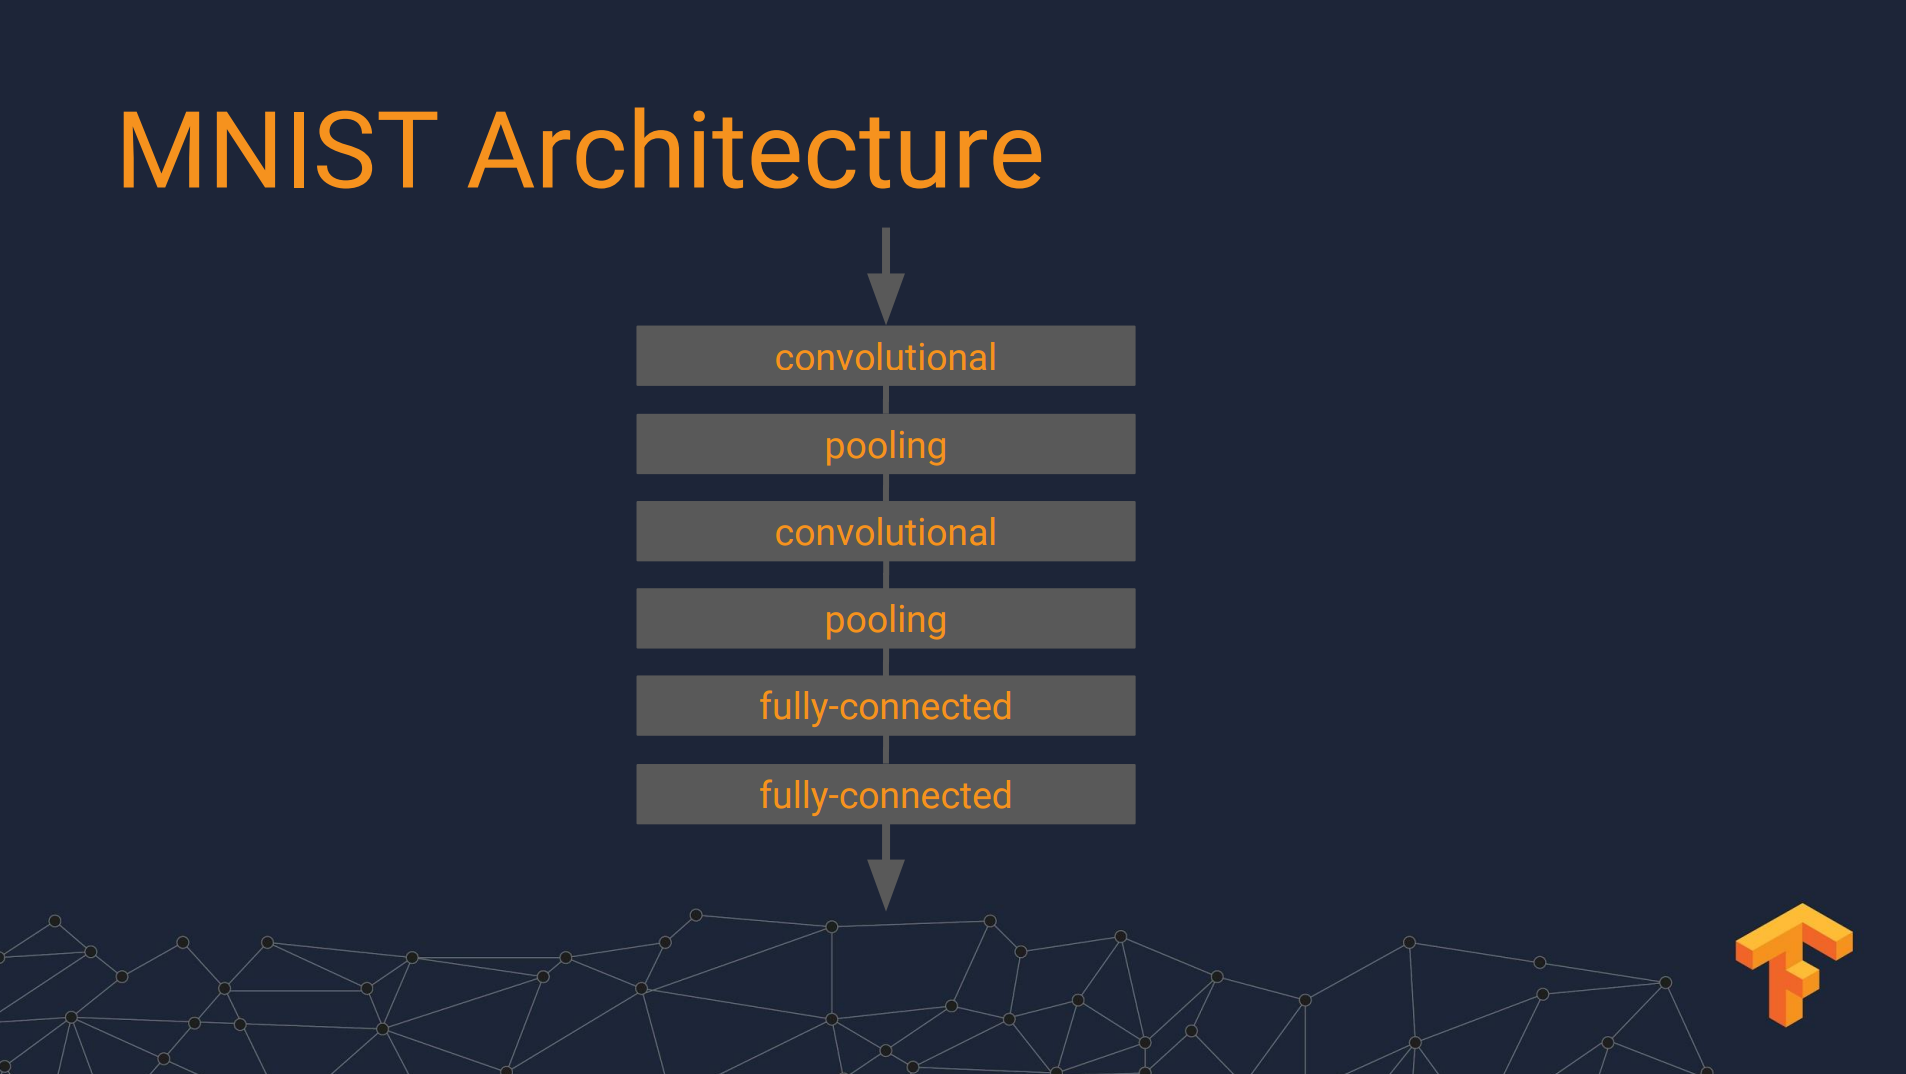

In [15]:
from IPython.display import Image
Image(filename='./assets/mnist_architecture.png') 

### 3.1 Running a model

##### 3.1.1 (Step through) First we are going to download the zip file associated with this homework from my courses and extract it. After we extract it, we are going to create few folders inside the extracted folder:

In [16]:
# code modified from Dandelion Mané's tensorboard tutorial
# at TensorFlow Dev Summit 2017

import os
###################################################################

#@TODO: CHANGE THIS TO YOUR DIRECTORY
HOME_FOLDER = "/Users/luna/workspace/TensorFlow-Tutorial/"

###################################################################

# create train folders
MNIST_FOLDER = os.path.join(HOME_FOLDER, "tf_mnist")
TRAIN_1_FOLDER = os.path.join(MNIST_FOLDER, "train-1")
TRAIN_2_FOLDER = os.path.join(MNIST_FOLDER, "train-2")
TRAIN_3_FOLDER = os.path.join(MNIST_FOLDER, "train-3")
if not os.path.isdir(MNIST_FOLDER):
    os.mkdir(MNIST_FOLDER)
if not os.path.isdir(TRAIN_1_FOLDER):
    os.mkdir(TRAIN_1_FOLDER)
if not os.path.isdir(TRAIN_2_FOLDER):
    os.mkdir(TRAIN_2_FOLDER)
if not os.path.isdir(TRAIN_3_FOLDER):
    os.mkdir(TRAIN_3_FOLDER)

##### 3.1.2  (Step through) Add some dependencies and get the MNIST dataset:

In [17]:
import os
import tensorflow as tf
import sys
import urllib

if sys.version_info[0] >= 3:
    from urllib.request import urlretrieve
else:
    from urllib import urlretrieve

GITHUB_URL ='https://raw.githubusercontent.com/mamcgrath/TensorBoard-TF-Dev-Summit-Tutorial/master/'

### MNIST EMBEDDINGS ###
mnist = tf.contrib.learn.datasets.mnist.read_data_sets(train_dir=MNIST_FOLDER
                                                       + '/data', one_hot=True)
### Get a sprite and labels file for the embedding projector ###
urlretrieve(GITHUB_URL + 'labels_1024.tsv', MNIST_FOLDER + '/labels_1024.tsv')
urlretrieve(GITHUB_URL + 'sprite_1024.png', MNIST_FOLDER + '/sprite_1024.png')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /Users/luna/workspace/TensorFlow-Tutorial/tf_mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /Users/luna/workspace/TensorFlow-Tutorial/tf_mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /Users/luna/workspace/TensorFlow-Tutorial/tf_mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /Users/luna/workspace/TensorFlow-Tutorial/tf_mnist/data/t10k-labels-idx1-ubyte.gz


('/Users/luna/workspace/TensorFlow-Tutorial/tf_mnist/sprite_1024.png',
 <httplib.HTTPMessage instance at 0x116c1c098>)

##### 3.1.3  (Step through) Creating a function to encapsulate convolution layer

In [18]:
# Add convolution layer
def conv_layer(input, channels_in, channels_out):
    w = tf.Variable(tf.zeros([5, 5, channels_in, channels_out]))
    b = tf.Variable(tf.zeros([channels_out]))
    conv = tf.nn.conv2d(input, w, strides=[1, 1, 1, 1], 
                        padding="SAME")
    act = tf.nn.relu(conv + b)
    return act

##### 3.1.4  (Step through) Creating a function to encapsulate fully connected layer

In [19]:
# Add fully connected layer
def fc_layer(input, channels_in, channels_out):
    w = tf.Variable(tf.zeros([channels_in, channels_out]))
    b = tf.Variable(tf.zeros([channels_out]))
    act = tf.nn.relu(tf.matmul(input, w)) + b
    return act

##### 3.1.5  (Step through) Setting up the model architecture

In [20]:
# Setup placeholders, and reshape the data
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])
x_image = tf.reshape(x, [-1, 28, 28, 1])

# Create the network
conv1 = conv_layer(x_image, 1, 32)
pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], 
                       strides=[1, 2, 2, 1], 
                       padding="SAME")

conv2 = conv_layer(pool1, 32, 64)
pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], 
                       strides=[1, 2, 2, 1], 
                       padding="SAME")
flattened = tf.reshape(pool2, [-1, 7 * 7 * 64])

fc1 = fc_layer(flattened, 7 * 7 * 64, 1024)
logits = fc_layer(fc1, 1024, 10) #predictions

##### 3.1.6  (Step through) Creating the loss and training configuration

In [21]:
# Compute cross entropy as our loss function
cost = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

# Use an AdamOptimizer to train the network
train_step = tf.train.AdamOptimizer(1e-4).minimize(cost)

# compute the accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

##### 3.1.7  (Step through) Training the model. (It will take a few minutes to finish 200 steps)

In [22]:
# Initialize all the variables
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# Train for 2000 steps
for i in range(201):
    batch = mnist.train.next_batch(100)
    
    # Occasionally report accuracy
    if i % 10 == 0:
        [loss, train_accuracy] = sess.run([cost, accuracy], 
                                    feed_dict={x: batch[0], 
                                               y: batch[1]})
        print("step %d, minibatch loss %g, training accuracy %g" 
              % (i, loss, train_accuracy))
        
    # Run the training step
    sess.run(train_step, feed_dict={x: batch[0], y: batch[1]})

step 0, minibatch loss 2.30259, training accuracy 0.09
step 10, minibatch loss 2.30263, training accuracy 0.13
step 20, minibatch loss 2.3025, training accuracy 0.13
step 30, minibatch loss 2.30254, training accuracy 0.12
step 40, minibatch loss 2.30263, training accuracy 0.1
step 50, minibatch loss 2.30263, training accuracy 0.11
step 60, minibatch loss 2.3024, training accuracy 0.12
step 70, minibatch loss 2.30273, training accuracy 0.07
step 80, minibatch loss 2.30244, training accuracy 0.1
step 90, minibatch loss 2.30279, training accuracy 0.08
step 100, minibatch loss 2.3022, training accuracy 0.14
step 110, minibatch loss 2.30261, training accuracy 0.08
step 120, minibatch loss 2.30242, training accuracy 0.14
step 130, minibatch loss 2.3024, training accuracy 0.12
step 140, minibatch loss 2.30238, training accuracy 0.15
step 150, minibatch loss 2.30231, training accuracy 0.15
step 160, minibatch loss 2.30299, training accuracy 0.09
step 170, minibatch loss 2.30207, training accur

##### 3.1.8 Question: By observing the loss and training accuracies, what can you conclude about the model? Do you think the model is learning anything? Explain.

***Answer***: Looking at the training accuracies and loss, it is concluded that the model is not learning anything. This is because the loss is not going down and the training accuracy is not going up. MNIST should reach above 90% accuracy in about 200 steps.

### 3.2 TensorBoard, Name Attribute, Name Scope and Summaries

Whenever you face such a situation where your model is not learning or there is something anomalous, finding the source of this anomaly is more of an art than traditional debugging by setting breakpoints. In such situation, visualizing the different characteristics of a model is quite helpful.

TensorBoard is a feature of TensorFlow, which lets you visualize a model, its weights, plot training accuracies, loss etc. To visualize these features of a model, we need to write these tensors into memory using the `tf.summary.FileWriter(n)`.

##### 3.2.1  (Step through) Visualizing the graph in TensorBoard (Assuming you are continuing from 3.1. If not please execute steps 3.1.1 to 3.1.6)

In [23]:
## set LOGDIR as the train-1 folder
LOGDIR = TRAIN_1_FOLDER

# Initialize all the variables
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

##############################################################
# writing the graph
writer = tf.summary.FileWriter(LOGDIR + "/")
writer.add_graph(sess.graph)
##############################################################

sess.run(tf.global_variables_initializer())

# Train for 200 steps
for i in range(201):
    batch = mnist.train.next_batch(100)
    
    # Occasionally report accuracy
    if i % 10 == 0:
        [loss, train_accuracy] = sess.run([cost, accuracy], 
                                    feed_dict={x: batch[0], 
                                               y: batch[1]})
        print("step %d, minibatch loss %g, training accuracy %g" 
              % (i, loss, train_accuracy))
        
    # Run the training step
    sess.run(train_step, feed_dict={x: batch[0], y: batch[1]})

step 0, minibatch loss 2.30259, training accuracy 0.13
step 10, minibatch loss 2.30258, training accuracy 0.1
step 20, minibatch loss 2.3026, training accuracy 0.11
step 30, minibatch loss 2.30255, training accuracy 0.09
step 40, minibatch loss 2.30247, training accuracy 0.08
step 50, minibatch loss 2.30242, training accuracy 0.16
step 60, minibatch loss 2.3024, training accuracy 0.12
step 70, minibatch loss 2.30261, training accuracy 0.05
step 80, minibatch loss 2.3026, training accuracy 0.09
step 90, minibatch loss 2.30245, training accuracy 0.1
step 100, minibatch loss 2.30222, training accuracy 0.1
step 110, minibatch loss 2.30227, training accuracy 0.15
step 120, minibatch loss 2.30242, training accuracy 0.09
step 130, minibatch loss 2.30254, training accuracy 0.14
step 140, minibatch loss 2.30229, training accuracy 0.11
step 150, minibatch loss 2.3025, training accuracy 0.13
step 160, minibatch loss 2.30199, training accuracy 0.17
step 170, minibatch loss 2.30223, training accura

##### 3.2.2  (Step through) Open TensorBoard. 
- You can open tensorboard while you are training a model
- Type the command `tensorboard -logdir=<TRAIN_DIR>` where TRAIN_DIR is your `HOME_DIR/tf_mnist/train-1`. Example: `tensorboard --logdir=/Users/luna/workspace/TensorFlow-Tutorial/tf_mnist/train-1`
- After you issue the command, you'll see the output `Starting TensorBoard 52 at`. 
- Browse to http://localhost:6006
- Click the Graphs tab
- Click the Scalars, Images, Distributions, Histograms and Embeddings tab. You should nothing there

The graph should look like as follows:

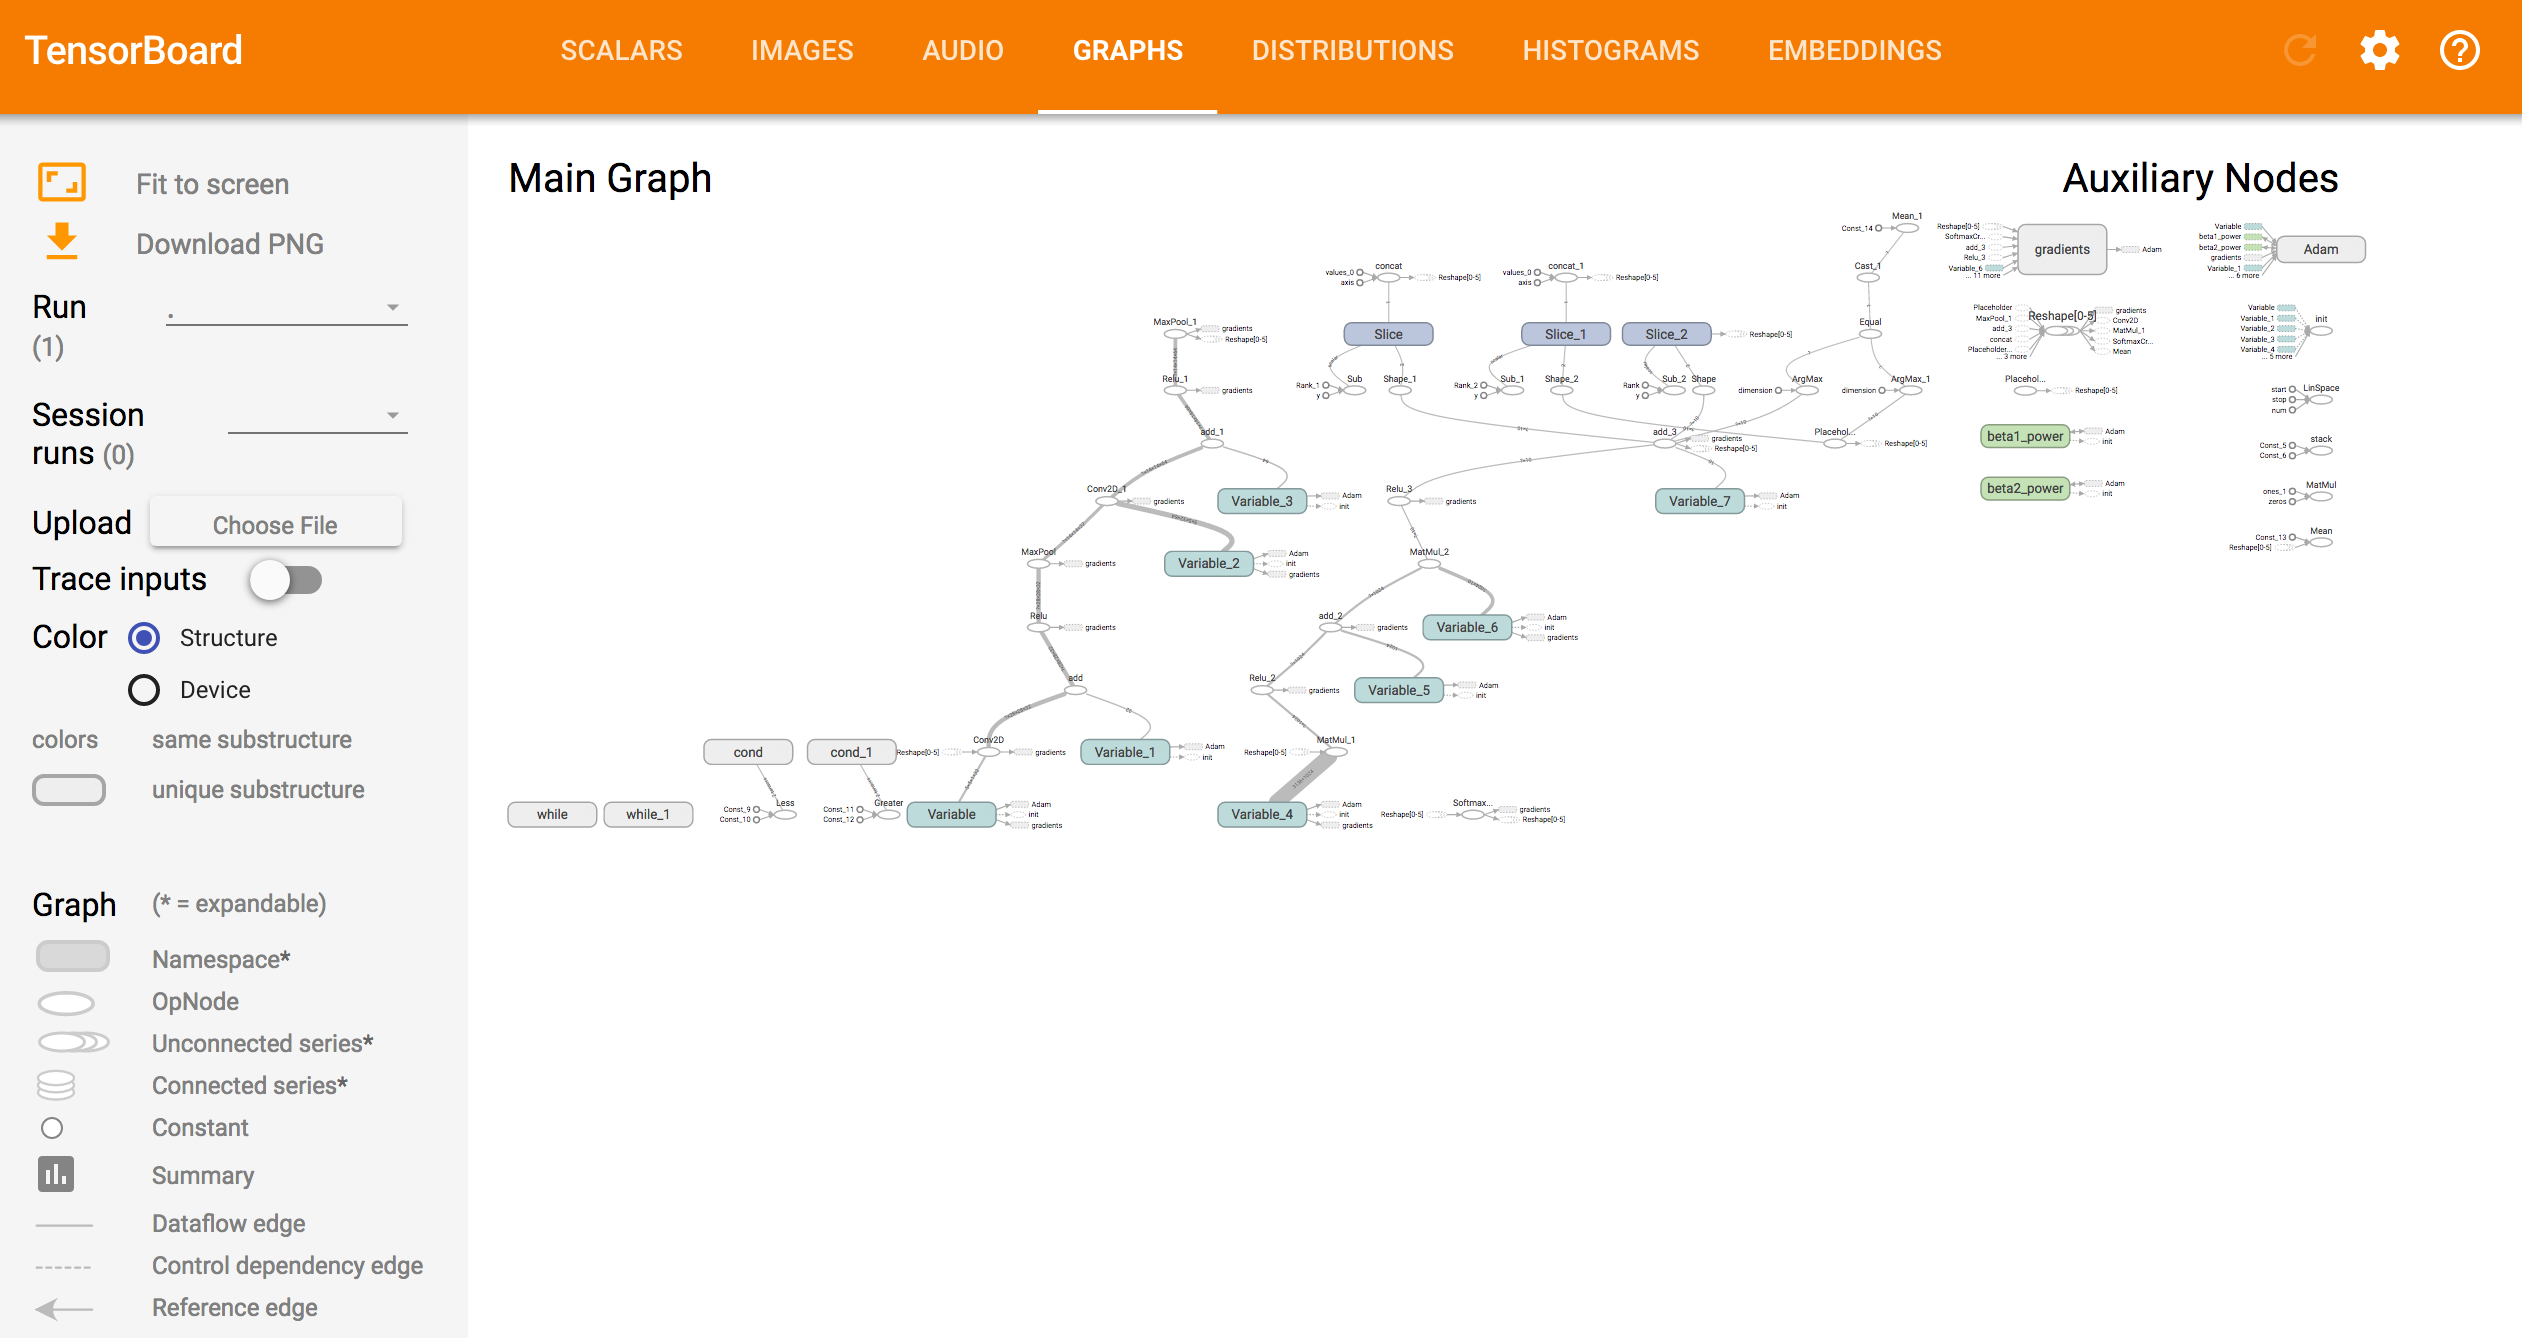

In [24]:
from IPython.display import Image
Image(filename='./assets/cluttered_graph.png') 

##### 3.2.3 (Step through) Cleaning the graph and adding summaries

###### Node Names and Name Scopes
Currently, our graph looks cluttered. This is because we haven't grouped and named our tensors. 

To correct this, 
- we can add a name attribute to our tensors whenever we are defining them. For instance, we can declare our convolution layer as `conv = tf.nn.conv2d(input, w, strides=[1, 1, 1, 1], padding="SAME", name="conv")`.
- we can put our layers under a name scope. For instance, we can modify our conv_layer function as follows:
```
def conv_layer(input, channels_in, channels_out, name="conv"):

  # add a name scope
  with tf.name_scope(name):
  
    # add a name attribute to w
    w = tf.Variable(tf.zeros([5, 5, channels_in, channels_out]), name="W")
    
    # add a name attribute to b
    b = tf.Variable(tf.zeros([channels_out]), name="B")
    
    conv = tf.nn.conv2d(input, w, strides=[1, 1, 1, 1], padding="SAME")
    act = tf.nn.relu(conv + b)
    return tf.nn.max_pool(act, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
```

###### Summaries
Our Scalars, Images, Distributions, Histograms and Embeddings tab show nothing right now because we haven't collected any summaries of our tensors. Summeries are written to disk when our model is training. You can write several types of summaries. Here are some commonly used ones:
- `tf.summary.scalar`
- `tf.summary.image`
- `tf.summary.audio`
- `tf.summary.histogram`

You can modify the conv_layer function by adding histogram summaries as follows:
```
def conv_layer(input, channels_in, channels_out, name="conv"):

  # add a name scope
  with tf.name_scope(name):
  
    # add a name attribute to w
    w = tf.Variable(tf.zeros([5, 5, channels_in, channels_out]), name="W")
    
    # add a name attribute to b
    b = tf.Variable(tf.zeros([channels_out]), name="B")
    
    conv = tf.nn.conv2d(input, w, strides=[1, 1, 1, 1], padding="SAME")
    act = tf.nn.relu(conv + b)
    
    # adding summaries
    tf.summary.histogram("weights", w)
    tf.summary.histogram("biases", b)
    tf.summary.histogram("activations", act)
    return tf.nn.max_pool(act, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
```

##### 3.2.4 (Task) Complete the following code by adding name attributes, name scopes and summaries. (Assuming you are continuing from 3.1. If not please execute steps 3.1.1 to 3.1.2)

In [25]:
# Add a name attribute to conv_layer
def conv_layer(x, channels_in, channels_out, name="conv"):
    ###########################################
    #@TODO: Enter Code Here - use the name
    # paramatere from the function
    
    with tf.name_scope(name):
    ###########################################
    
        # add a name attribute to w
        w = tf.Variable(tf.zeros([5, 5, channels_in, 
                                 channels_out]), name="W")
    
        # add a name attribute to b
        b = tf.Variable(tf.zeros([channels_out]), name="B")
        
        conv = tf.nn.conv2d(x, w, 
                            strides=[1, 1, 1, 1], 
                            padding="SAME")
        
        act = tf.nn.relu(conv + b)
        
        ###########################################
        #@TODO: Enter Code Here - add histogram
        # summaries to w, b and act, with names
        # "weights", "biases" and "activations"
        # respectively
        tf.summary.histogram("weights", w)
        tf.summary.histogram("biases", b)
        tf.summary.histogram("activations", act)
        ###########################################
        return tf.nn.max_pool(act, ksize=[1, 2, 2, 1], 
                              strides=[1, 2, 2, 1], padding="SAME")


# Add a name attribute to fc_layer. name it "fc"
def fc_layer(x, channels_in, channels_out, name="fc"):
    ###########################################
    #@TODO: Enter Code Here - use the name
    # paramatere from the function
    
    with tf.name_scope(name):
    ###########################################
    
        #@TODO: add a name attribute to w. name it "W"
        w = tf.Variable(tf.zeros([channels_in, 
                                  channels_out]), name="W")
        
        #@TODO: add a name attribute to b. name it "B"
        b = tf.Variable(tf.zeros([channels_out]), name="B")
        
        act = tf.nn.relu(tf.matmul(x, w) + b)
        
        ###########################################
        #@TODO: Enter Code Here - add histogram
        # summaries to w, b and act, with names
        # "weights", "biases" and "activations"
        # respectively
        tf.summary.histogram("weights", w)
        tf.summary.histogram("biases", b)
        tf.summary.histogram("activations", act)
        ###########################################
        return act

# Add a name attribute to fc_layer. name it "fc_no_relu"
def fc_no_relu(x, channels_in, channels_out, name="fc_no_relu"):
    ###########################################
    #@TODO: Enter Code Here - use the name
    # paramatere from the function
    
    with tf.name_scope(name):
    ###########################################
    
        #@TODO: add a name attribute to w. name it "W"
        w = tf.Variable(tf.zeros([channels_in, 
                                  channels_out]), name="W")
        
        #@TODO: add a name attribute to b. name it "B"
        b = tf.Variable(tf.zeros([channels_out]), name="B")
        
        
        out = tf.matmul(x, w) + b
        
        ###########################################
        #@TODO: Enter Code Here - add histogram
        # summaries to w, b and act, with names
        # "weights", "biases" and "activations"
        # respectively
        tf.summary.histogram("weights", w)
        tf.summary.histogram("biases", b)
        ###########################################
        return out

def mnist_model(learning_rate, use_two_conv, use_two_fc,
                num_iterations, batch_size, hparam, log_dir):
    
    tf.reset_default_graph()
    sess = tf.Session()
    
    # Setup placeholders, and reshape the data
    #@TODO: Add name attribute to x. name it "x"
    x = tf.placeholder(tf.float32, shape=[None, 784], name="x")
    
    #@TODO: Add name attribute to y. name it "labels"
    y = tf.placeholder(tf.float32, shape=[None, 10], name="labels")
    
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    
    ###########################################
    #@TODO: Enter Code Here - add image summary
    # of x_image using tf.summary.image.
    # name it "input"
    tf.summary.image('input', x_image, 3)
    ###########################################
    
    if use_two_conv:
        #@TODO: pass the name "conv1"
        conv1 = conv_layer(x_image, 1, 32, "conv1")
        
        #@TODO: pass the name "conv2"
        conv_out = conv_layer(conv1, 32, 64, "conv2")
    else:
        
        #@TODO: pass the name "conv"
        conv1 = conv_layer(x_image, 1, 64, "conv")
        conv_out = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], 
                                  strides=[1, 2, 2, 1], 
                                  padding="SAME")

    flattened = tf.reshape(conv_out, [-1, 7 * 7 * 64])
    keep_prob = tf.placeholder(tf.float32)
    
    if use_two_fc:
        
        #@TODO: pass the name "fc1"
        fc1 = fc_layer(flattened, 7 * 7 * 64, 1024, "fc1")
        
        embedding_input = fc1
        embedding_size = 1024
        
        # add dropout
        fc1 = tf.nn.dropout(fc1, keep_prob)
        
        #@TODO: pass the name "fc2"
        logits = fc_no_relu(fc1, 1024, 10, "fc2")
        
    else:
        embedding_input = flattened
        embedding_size = 7*7*64
        
        #@TODO: pass the name "fc"
        logits = fc_no_relu(flattened, 7*7*64, 10, "fc")
        logits = tf.nn.dropout(logits, keep_prob)
    
    ###########################################
    #@TODO: Enter Code Here - add a name scope
    #to xent. name it "xent"
    
    with tf.name_scope("xent"):
    ###########################################
    
        xent = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(
                logits=logits, labels=y), name="xent")
        
        ###########################################
        #@TODO: Enter Code Here - add scalar
        # summaries to xent, with name "xent"
        tf.summary.scalar("loss", xent)
        ###########################################
        
    ###########################################
    #@TODO: Enter Code Here - add a name scope
    #to train_step. name it "train"
    with tf.name_scope("train"):
    ###########################################
    
        train_step = tf.train.AdamOptimizer(learning_rate).minimize(xent)

    ###########################################
    #@TODO: Enter Code Here - add a name scope
    #to prediction and accuracy. name it 
    #"accuracy"
    with tf.name_scope("accuracy"):
    ###########################################
    
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
        ###########################################
        #@TODO: Enter Code Here - add scalar
        # summaries to accuracy, with name "accuracy"
        tf.summary.scalar("accuracy", accuracy)
        ###########################################
        
    # merge all summaries    
    summ = tf.summary.merge_all()
    
    # Embedding visualization
    embedding = tf.Variable(tf.zeros([1024, embedding_size]), 
                            name="test_embedding")
    assignment = embedding.assign(embedding_input)
    saver = tf.train.Saver()

    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(log_dir + "/" + hparam)
    writer.add_graph(sess.graph)
    
    config = tf.contrib.tensorboard.plugins.projector.ProjectorConfig()
    embedding_config = config.embeddings.add()
    embedding_config.tensor_name = embedding.name
    embedding_config.sprite.image_path = MNIST_FOLDER + '/sprite_1024.png'
    embedding_config.metadata_path = MNIST_FOLDER + '/labels_1024.tsv'
      
    # Specify the width and height of a single thumbnail.
    embedding_config.sprite.single_image_dim.extend([28, 28])
    tf.contrib.tensorboard.plugins.projector.visualize_embeddings(writer, config)

    for i in range(num_iterations+1):
        batch = mnist.train.next_batch(batch_size)
        if i % 10 == 0:
            [loss, train_accuracy, s] = sess.run([xent, accuracy, summ], 
                                           feed_dict={x: batch[0], 
                                                      y: batch[1],
                                                     keep_prob: 1.0})
            print("step %d, minibatch loss %g, training accuracy %g" 
                  % (i, loss, train_accuracy))
            writer.add_summary(s, i)
        train_step.run(session=sess, feed_dict={x: batch[0], 
                                                y: batch[1], 
                                                keep_prob: 0.5})
        if i % 100 == 0:
            sess.run(assignment, feed_dict={x: mnist.test.images[:1024], 
                                            y: mnist.test.labels[:1024],
                                           keep_prob: 0.5})
            saver.save(sess, os.path.join(log_dir, "model.ckpt"), i)
            print('test accuracy %g' % accuracy.eval(session=sess, feed_dict={
                x: mnist.test.images, 
                y: mnist.test.labels, 
                keep_prob: 1.0}))

def make_hparam_string(learning_rate, 
                       use_two_fc, 
                       use_two_conv,
                       num_iterations,
                       batch_size):
    conv_param = "conv=2" if use_two_conv else "conv=1"
    fc_param = "fc=2" if use_two_fc else "fc=1"
    num_iteration_param = "num_iter=" + str(num_iterations)
    batch_size_param = "batch_size=" + str(batch_size)
    return "lr_%.0E,%s,%s,%s,%s" % (learning_rate, conv_param, 
                                    fc_param, num_iteration_param,
                                   batch_size_param)

##### 3.2.5 (Step through) Train the model with learning rate of 0.0001, using two fc layers, two conv layer, batch_size of 50 and num_iterations of 201

In [26]:
# You can try adding some more learning rates
for learning_rate in [1E-4]:
    # Include "False" as a value to try different model architectures
    for use_two_fc in [True]:
          for use_two_conv in [True]:
            for batch_size in [50]:
                for num_iterations in [201]:
                    
                    hparam = make_hparam_string(learning_rate, use_two_fc, 
                                                use_two_conv, 
                                                num_iterations, 
                                                batch_size)
                    print('Starting run for %s' % hparam)

                    # Actually run with the new settings
                    mnist_model(learning_rate, use_two_fc, use_two_conv, 
                                num_iterations, batch_size, hparam, TRAIN_2_FOLDER)

Starting run for lr_1E-04,conv=2,fc=2,num_iter=201,batch_size=50
step 0, minibatch loss 2.30259, training accuracy 0.1
test accuracy 0.1135
step 10, minibatch loss 2.30248, training accuracy 0.1
step 20, minibatch loss 2.30276, training accuracy 0.06
step 30, minibatch loss 2.30264, training accuracy 0.12
step 40, minibatch loss 2.30251, training accuracy 0.1
step 50, minibatch loss 2.30259, training accuracy 0.1
step 60, minibatch loss 2.3028, training accuracy 0.14
step 70, minibatch loss 2.30234, training accuracy 0.12
step 80, minibatch loss 2.30249, training accuracy 0.12
step 90, minibatch loss 2.30239, training accuracy 0.14
step 100, minibatch loss 2.30291, training accuracy 0.1
test accuracy 0.1135
step 110, minibatch loss 2.30256, training accuracy 0.06
step 120, minibatch loss 2.30259, training accuracy 0.12
step 130, minibatch loss 2.30268, training accuracy 0.08
step 140, minibatch loss 2.30247, training accuracy 0.12
step 150, minibatch loss 2.30255, training accuracy 0.0

##### 3.2.6 (Step through) Open the train-2 directory in TensorBoard using the command from step 3.2.2. Example: `tensorboard --logdir=/Users/luna/workspace/TensorFlow-Tutorial/tf_mnist/train-2`
- Click on Graphs tab
- On the left hand side, you will see a field called "Run"
- select the "lr_1E-04,conv=2,fc=2,2000,batch_size=100" run

You'll see a similar graph to the following. Adding names, name scope made our graph much cleaner!

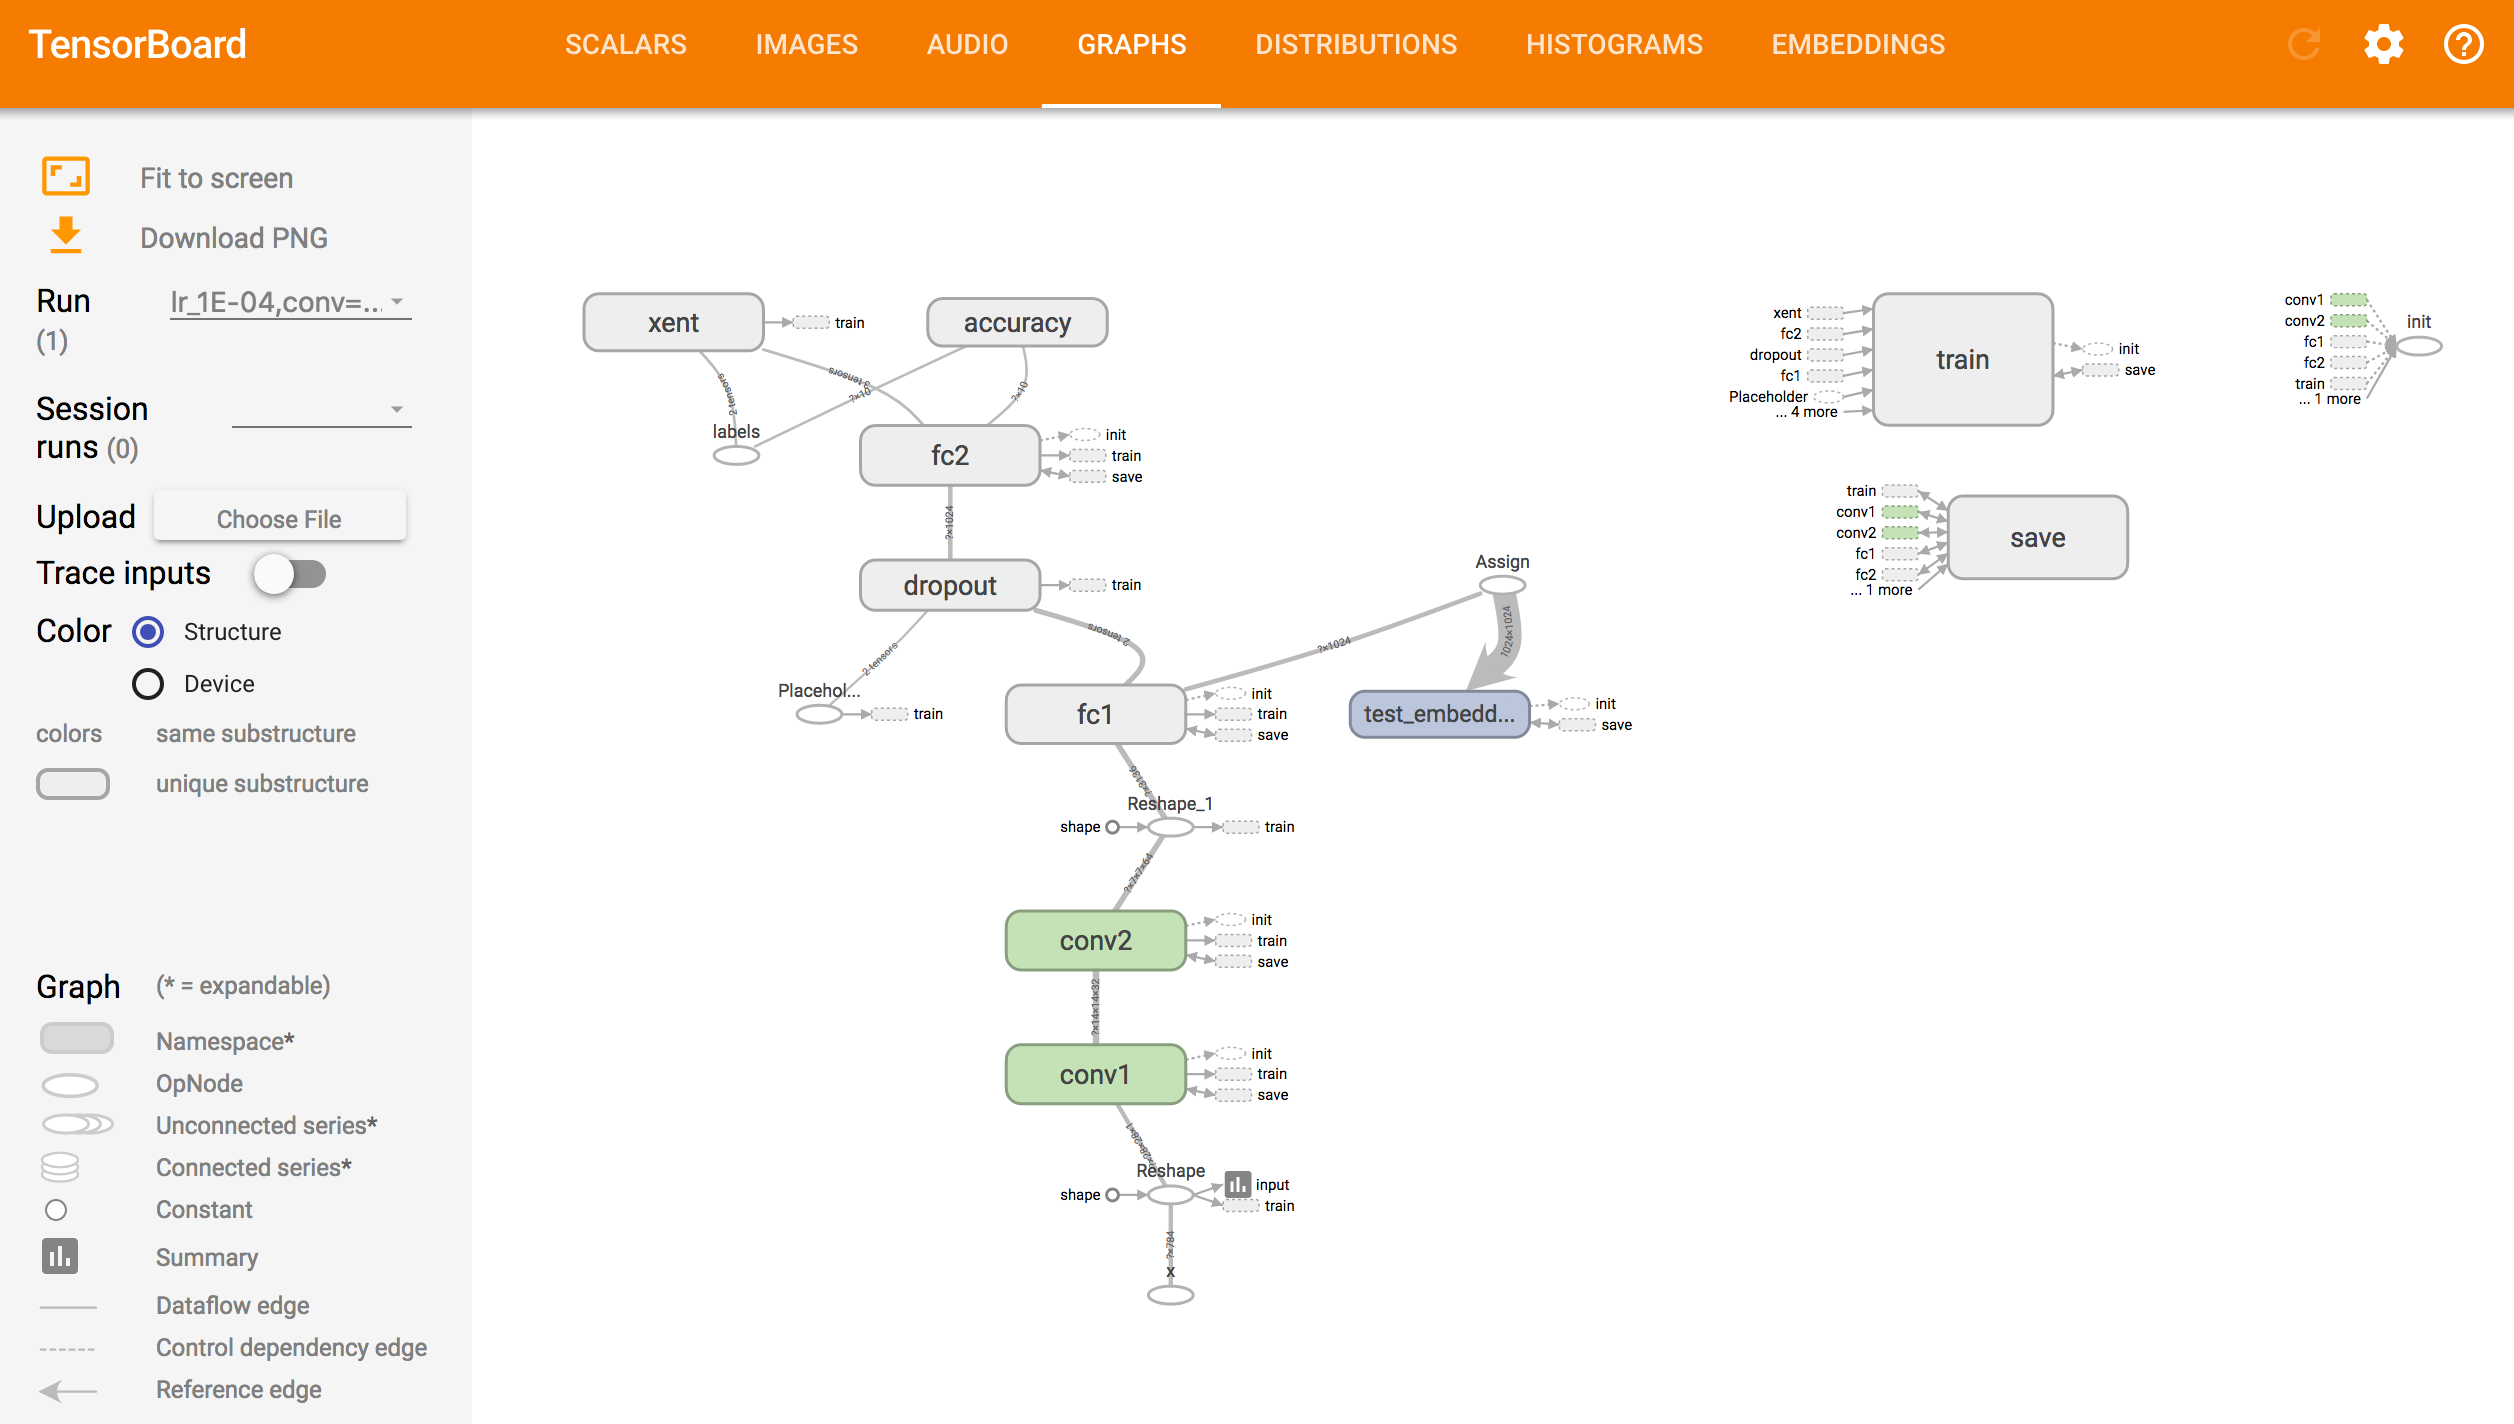

In [27]:
from IPython.display import Image
Image(filename='./assets/clean_graph.png') 

##### 3.2.7 (Step through) Visualizing Histogram and Distribution

##### Histogram Dashboard

The Histogram Dashboard displays how the statistical distribution of a Tensor has varied over time. It visualizes data recorded via `tf.summary.histogram`. Each chart shows temporal "slices" of data, where each slice is a histogram of the tensor at a given step. It's organized with the oldest timestep in the back, and the most recent timestep in front. By changing the Histogram Mode from "offset" to "overlay", the perspective will rotate so that every histogram slice is rendered as a line and overlaid with one another.

- X axis = histogram bins
- Y axis = frequency density
- Z axis = time steps
- You can change the viewing mode by clicking "overlay" button on the left hand side in the "Histogram Mode" panel. Overlay mode, overlays all the frequency densities from the time steps onto each other.

##### Distribution Dashboard

The Distribution Dashboard is another way of visualizing histogram data from tf.summary.histogram. It shows some high-level statistics on a distribution. Each line on the chart represents a percentile in the distribution over the data: for example, the bottom line shows how the minimum value has changed over time, and the line in the middle shows how the median has changed. Reading from top to bottom, the lines have the following meaning: [maximum, 93%, 84%, 69%, 50%, 31%, 16%, 7%, minimum]

These percentiles can also be viewed as standard deviation boundaries on a normal distribution: [maximum, μ+1.5σ, μ+σ, μ+0.5σ, μ, μ-0.5σ, μ-σ, μ-1.5σ, minimum] so that the colored regions, read from inside to outside, have widths [σ, 2σ, 3σ] respectively.

- X axis = time steps
- Y axis = bin values

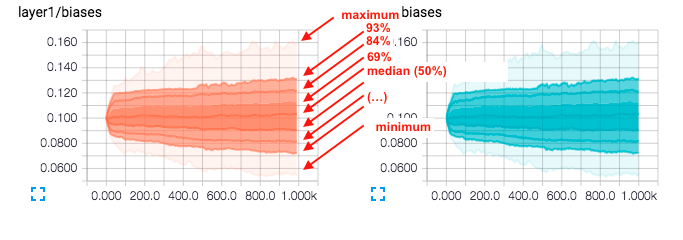

In [28]:
from IPython.display import Image
Image(filename='./assets/histogram_labelled.png')

The above histogram can be interpreted as:

The curve labeled 93% is the percentile 93%, meaning that 93% of the observations were bellow the value ~0.130 at the time step 1.00k. So the graph gives 3 things of information, the percentage of observations bellow a certain value according to some think curve at every time step of the computation of the neural network training (at least in this case its what the steps mean). This gives you a feel of the distribution of values of your network.

##### 3.2.8 (Step through) Click the histogram tab and Distrubtion tab. The distributions should look the following

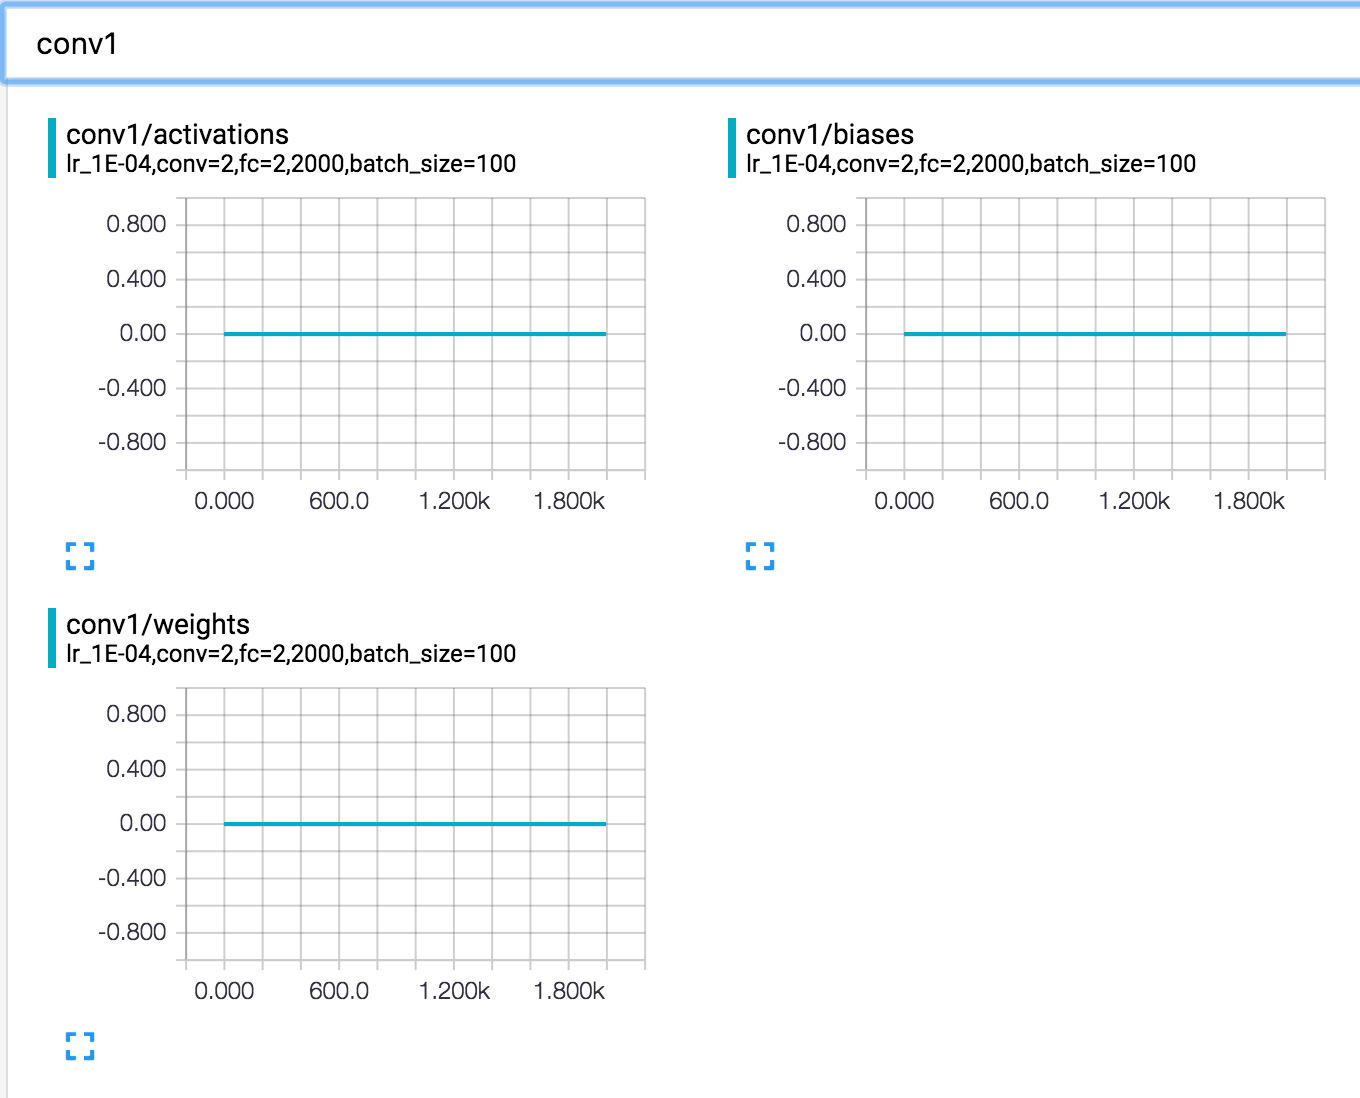

In [29]:
from IPython.display import Image
Image(filename='./assets/zero_dist.png')

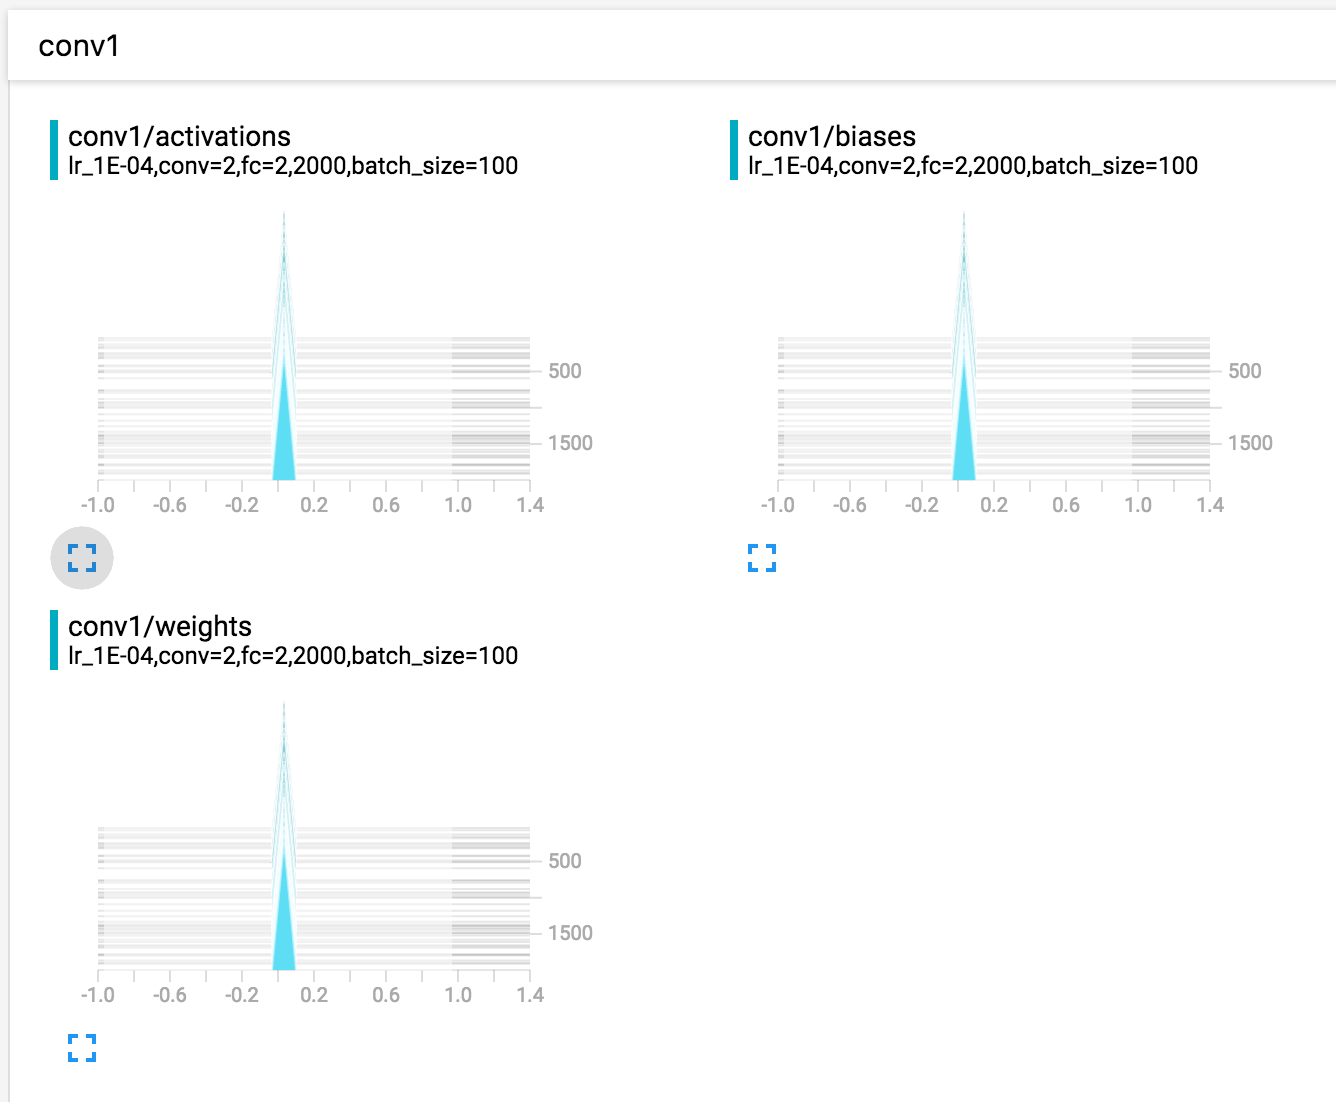

In [30]:
from IPython.display import Image
Image(filename='./assets/zero_hist.png')

##### 3.2.9 Question: What is odd about these visualizations? What does it tell you about why our model didn't learn anything? Can you fix it? (Hint: Look into how the weights and biases were initialized in the conv, fc layer  and fc_no_relu layer. Check out this function in the Python API: tf.truncated_normal())

***Answer:*** From the visualizations we can see that our weights and biases are all at 0. That is defninitely a sign that the model's neurons are dead. Looking into our initializations of weight and biases, we can see that they were initialized as 0. As a result, during backpropagation, we had zero gradients and hence, our model failed to learn anything. To fix this, we should consider initializing the weights with different initialization methods like xavier initialization, truncated normal etc. Moreover, the bias should be set as some constant other than 0.

Fix: 
- Change weights and biases in conv_layer with:
    ```
    w = tf.Variable(tf.truncated_normal([5, 5, channels_in, channels_out], stddev=0.1), name="W")
    b = tf.Variable(tf.constant(0.1, shape=[channels_out]), name="B")
    ```
- Change weights and biases in fc_layer with:
    ```
    w = tf.Variable(tf.truncated_normal([channels_in, channels_out], stddev=0.1), name="W")
    b = tf.Variable(tf.constant(0.1, shape=[channels_out]), name="B")
    ```

##### 3.2.10 (Step through) Run step 3.2.4 after fixing the weights and biases layer and then execute the following. The following code does a hyperparameter search. This will take about 10 minutes to finish.

In [38]:
# You can try adding some more learning rates
for learning_rate in [1E-4, 1E-3]:
    # Include "False" as a value to try different model architectures
    for use_two_fc in [True, False]:
        # Include "False" as a value to try different model architectures
          for use_two_conv in [True, False]:
            # Include different batch size
            for batch_size in [100]:
                # Include different number of iterations
                for num_iterations in [200]:
                    
                    hparam = make_hparam_string(learning_rate, use_two_fc, 
                                                use_two_conv, 
                                                num_iterations, 
                                                batch_size)
                    print('Starting run for %s' % hparam)

                    # Actually run with the new settings
                    mnist_model(learning_rate, use_two_fc, use_two_conv, 
                                num_iterations, batch_size, hparam, TRAIN_3_FOLDER)

Starting run for lr_1E-04,conv=2,fc=2,200,batch_size=100
step 0, minibatch loss 7.11077, training accuracy 0.12
test accuracy 0.1046
step 10, minibatch loss 2.53039, training accuracy 0.32
step 20, minibatch loss 1.39271, training accuracy 0.51
step 30, minibatch loss 0.814942, training accuracy 0.76
step 40, minibatch loss 0.853748, training accuracy 0.73
step 50, minibatch loss 0.635268, training accuracy 0.8
step 60, minibatch loss 0.687161, training accuracy 0.77
step 70, minibatch loss 0.497785, training accuracy 0.86
step 80, minibatch loss 0.511338, training accuracy 0.86
step 90, minibatch loss 0.564001, training accuracy 0.84
step 100, minibatch loss 0.454551, training accuracy 0.86
step 110, minibatch loss 0.530715, training accuracy 0.82
step 120, minibatch loss 0.449042, training accuracy 0.87
step 130, minibatch loss 0.296628, training accuracy 0.91
step 140, minibatch loss 0.451804, training accuracy 0.82
step 150, minibatch loss 0.340495, training accuracy 0.9
step 160, 

##### 3.2.11 (Step through) Open the train-3 directory in TensorBoard using the command from step 3.2.2. Example: `tensorboard --logdir=/Users/luna/workspace/TensorFlow-Tutorial/tf_mnist/train-3`

##### 3.2.12 Question: Click on the Scalars tab in TensorFlow. You can see all of the experiments plotted on two graphs, accuracy and cross entropy loss. Looking at the chart for accuracy and loss, which configuration performend the best? Why so? Tips: You can use the smoothing tool on the left hand side to get a better jidgment. The charts should look like as follows:

***Answer***: From the plots, it is seen that the configuration of:
- learning rate = 0.001
- number of conv layers = 2
- number of fc layers = 2
- batch size = 100
- number of iterations = 200
performs the best (violet color line). 

This configuration was chosen because the loss curve is the steepest, and reflects a good gradient descent and convergence.

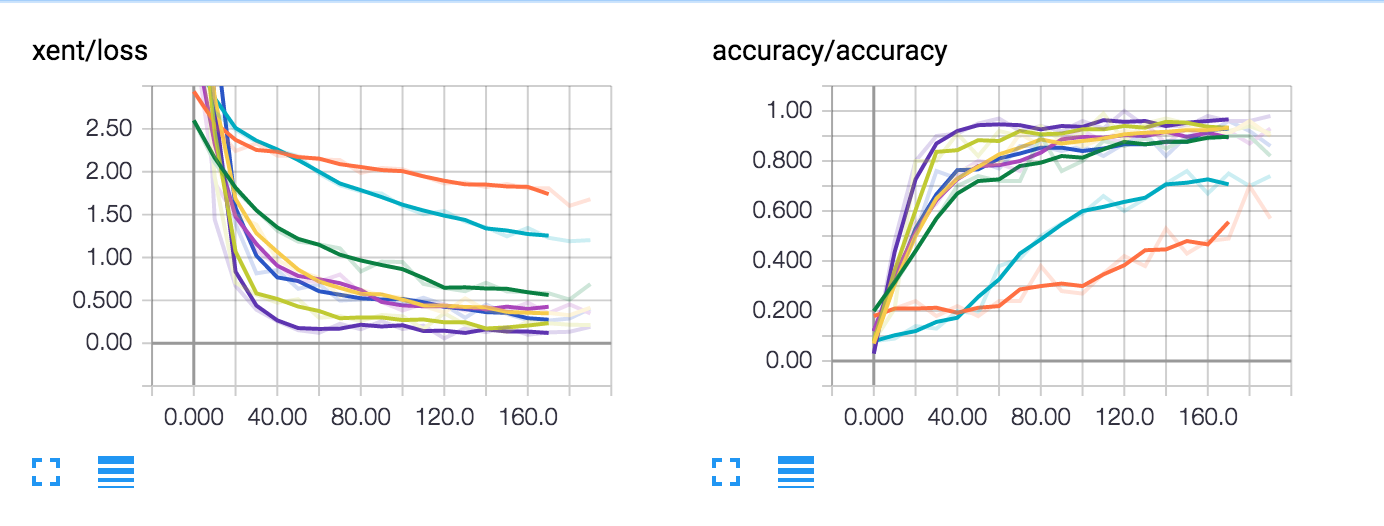

In [31]:
from IPython.display import Image
Image(filename='./assets/experiments.png')

##### 3.2.13 Question: Click on the Histogram tab in Tensorboard. On the left hand side in the Runs panel, only select the configuration that you found best from step 3.2.12. Click on the histograms for conv1. You can see three histogram plots for weights, biases and activations. Describe the distribution for each of them. Do you gain any insight on the characteristics of you model? Tips: You can you use the overlay tool on the left hand side to get some insight. The charts should look like as follows:

***Answer***:
- Weights Histogram: The historgram looks like a normal distribution. With increasing time steps, the distribution seems to approach a bell curve. This might signify that our model is generalizing well.
- Biases Histogram: It is seen that at early stages of the training, the biases are big and it decreases gradually with increasing time steps.
- Activations Histogram: It is seen that the activation histogram has a spike at bin value of 0.0934 which signifies the threshold of our neuron.

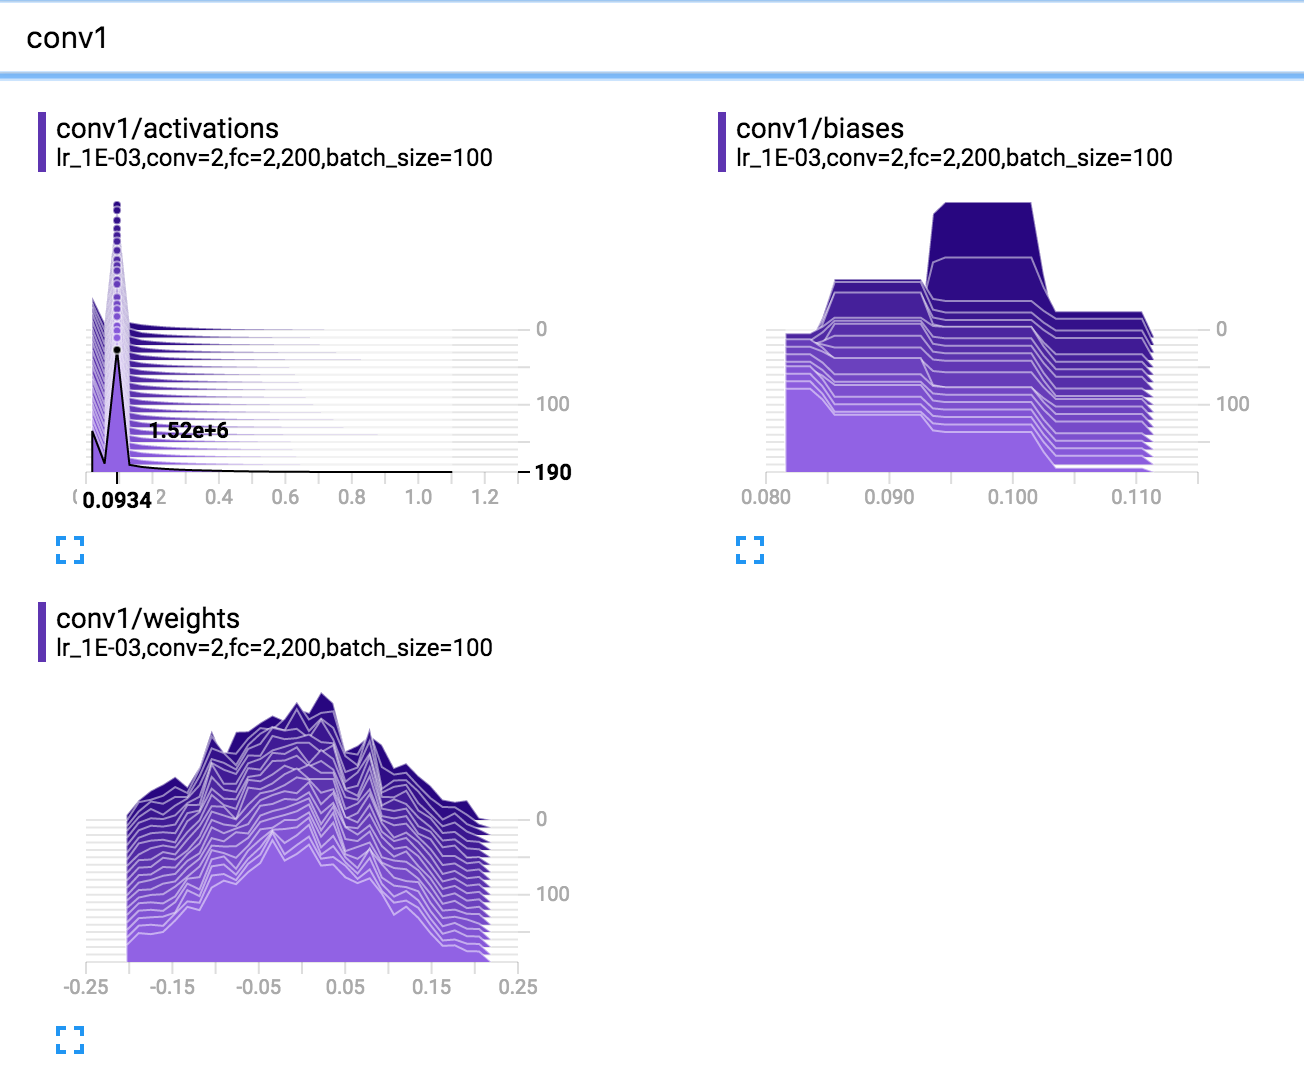

In [32]:
from IPython.display import Image
Image(filename='./assets/best-hist.png')

##### 3.2.14 Question: Click on the Distribution tab in Tensorboard. On the left hand side in the Runs panel, only select the configuration that you found best from step 3.2.12. Click on the distribution for conv1. You can see three distribution plots for weights, biases and activations as seen below. What can you say about these plots?

***Answer***: The weights distribution looks like that most of the bin values are changing in the median percentile. For the activations distribution, it looks like the bin values are changing towards the minimum percentile and it seems to be the same case for the biases distribution.

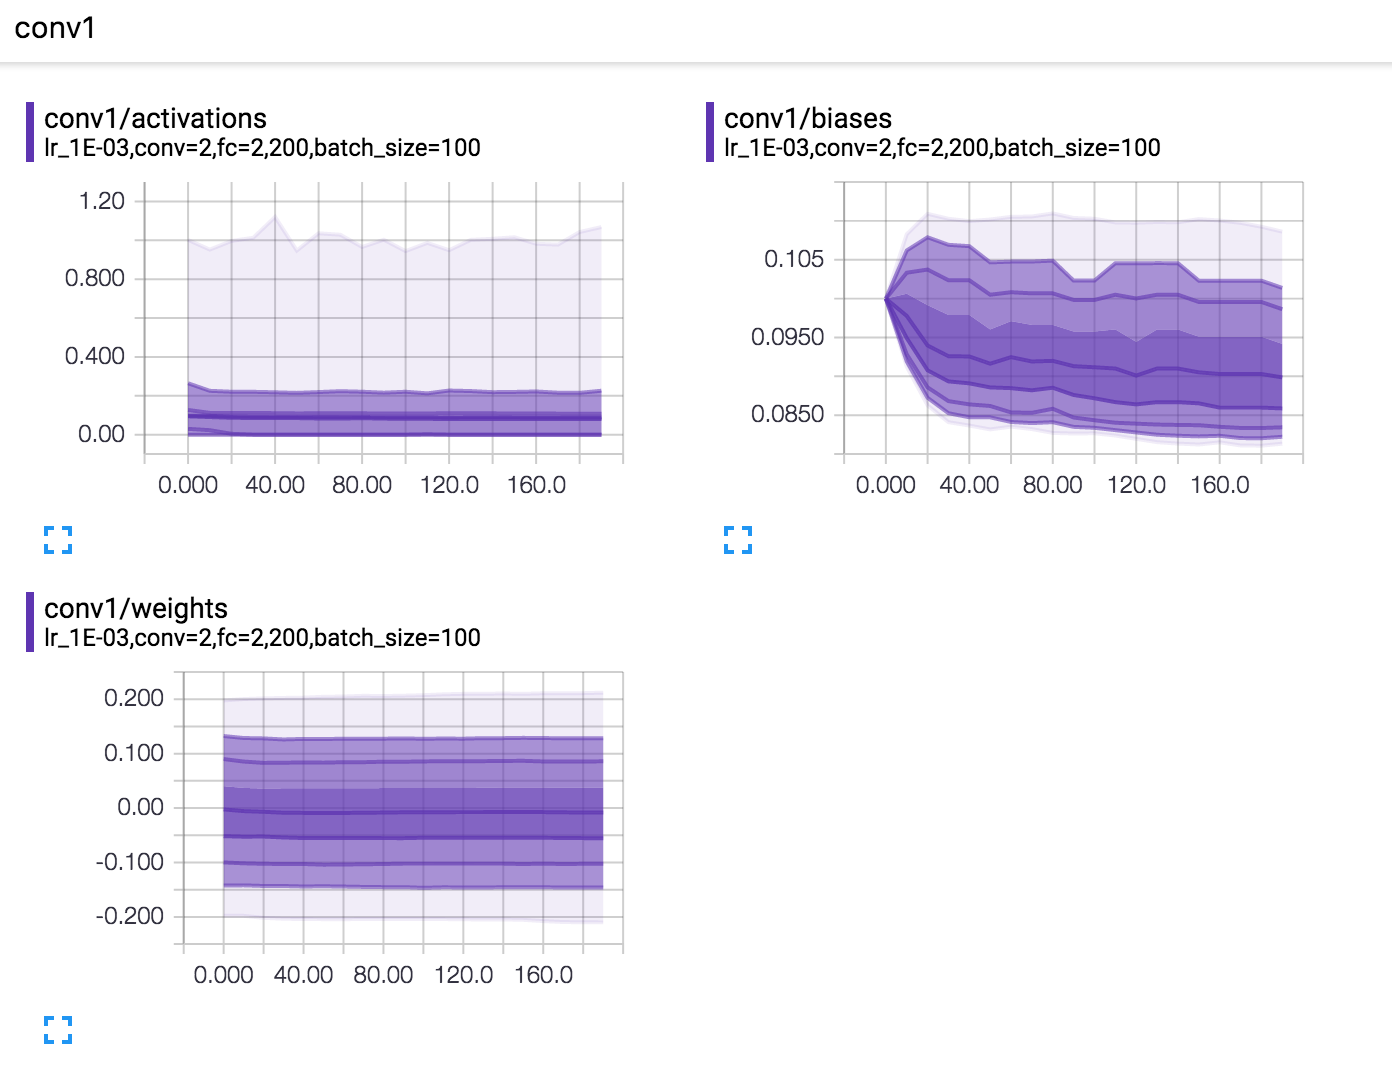

In [33]:
from IPython.display import Image
Image(filename='./assets/best-dist.png')

##### 3.2.15 Question: Click on the Embedding tab in Tensorboard. On the left hand side in the Data panel, only select the configuration that you found best from step 3.2.12. Click on the PCA button on the left hand side. You can see the fc1 logits on a 3 dimensional plane as seen below. Describe what you are seeing? (Tips: http://colah.github.io/posts/2014-10-Visualizing-MNIST/)

***Answer***: Principal Component Analysis is a straightforward technique for reducing dimensions. The Embedding Projector computes the top 10 principal components. The menu lets you project those components onto any combination of two or three. PCA is a linear projection, often effective at examining global geometry.

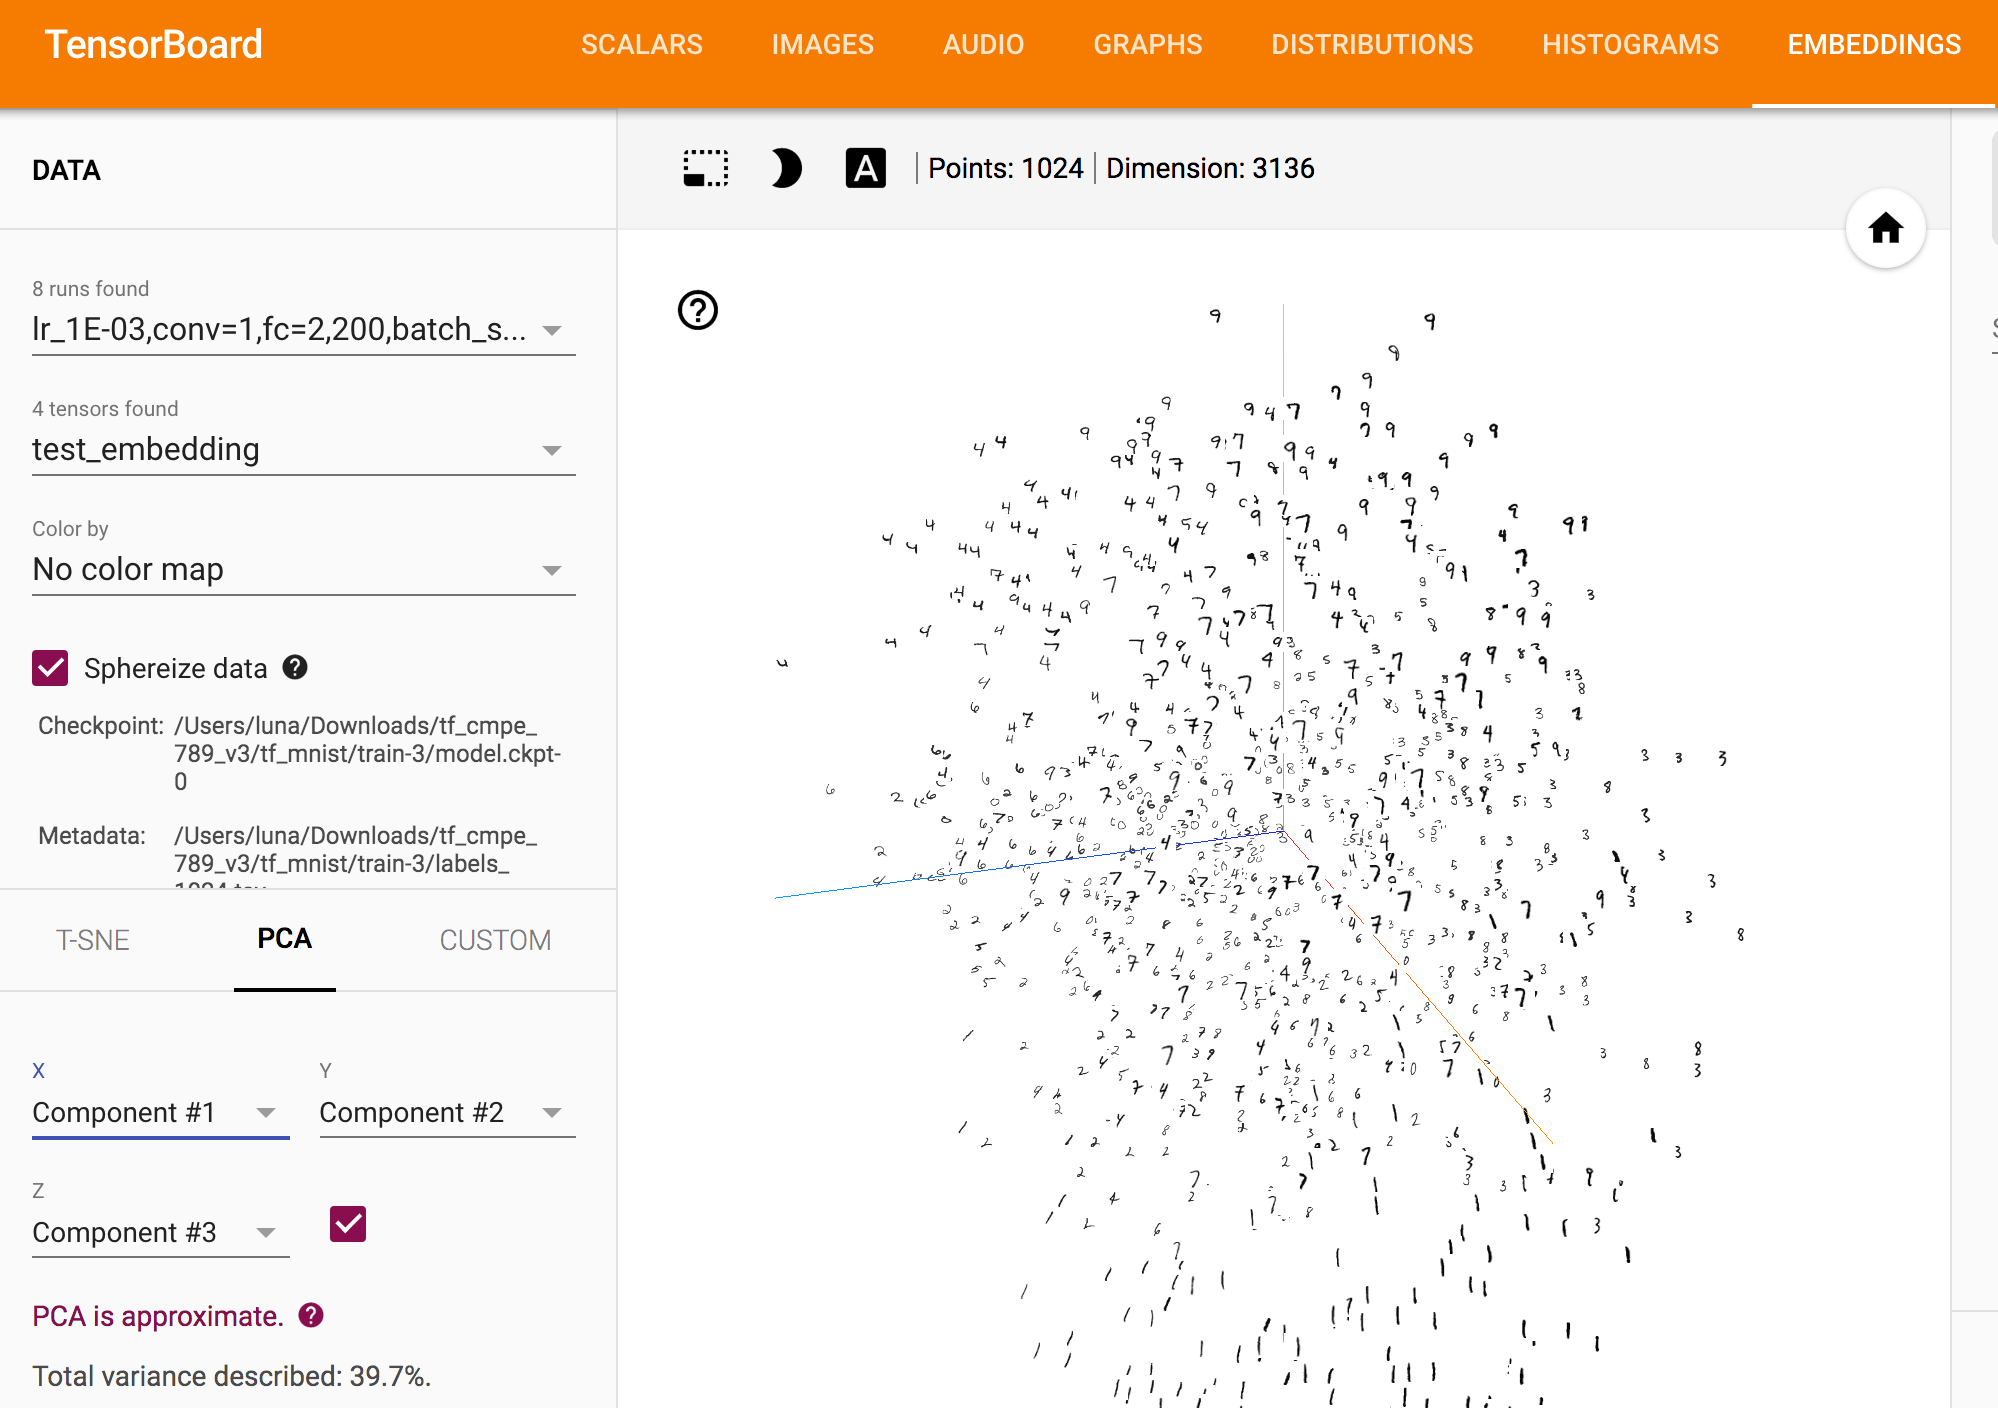

In [34]:
from IPython.display import Image
Image(filename='./assets/pca.png')

##### 3.2.16 Question: Click on the T-SNE button on the left hand side. You can see fc1 logits are displayed on the T-SNE space. Describe what you are seeing? (Tips: http://colah.github.io/posts/2014-10-Visualizing-MNIST/, http://distill.pub/2016/misread-tsne/)

***Answer***: t-SNE is popular non-linear dimensionality reduction technique. The Embedding Projector offers both two- and three-dimensional t-SNE views. Layout is performed client-side animating every step of the algorithm. Because t-SNE often preserves some local structure, it is useful for exploring local neighborhoods and finding clusters. Although extremely useful for visualizing high-dimensional data, t-SNE plots can sometimes be mysterious or misleading.

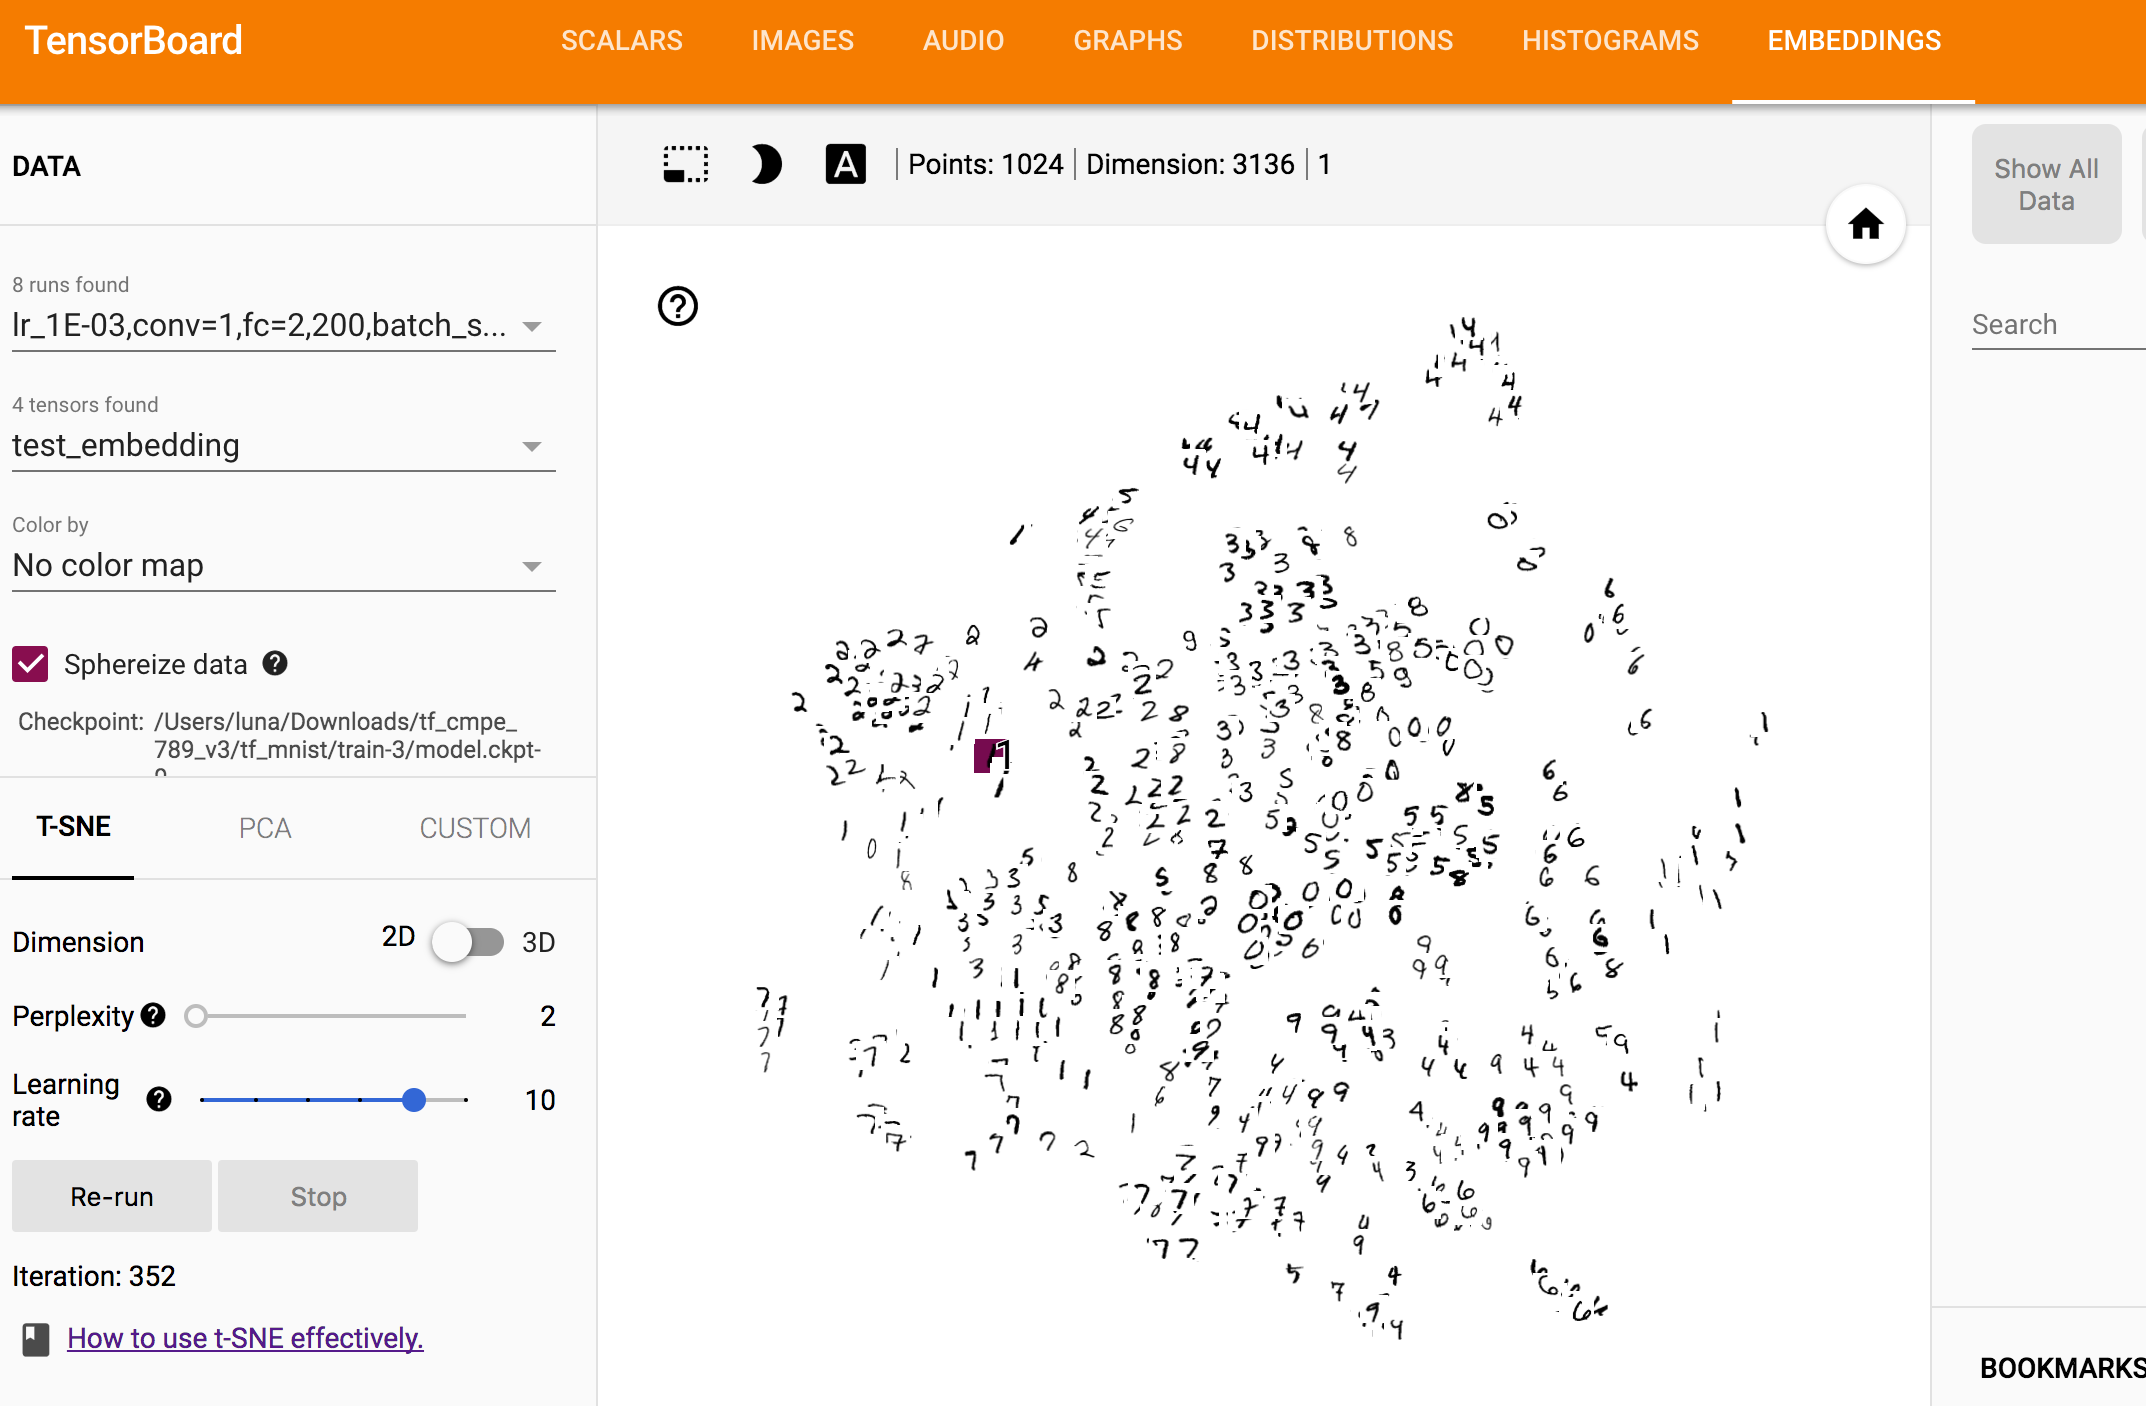

In [35]:
from IPython.display import Image
Image(filename='./assets/tsne.png')

# Domain Specific API for Seq2Seq
1. https://github.com/tensorflow/nmt